In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pixel_to_binary(pixel):
    return format(pixel,'08b')

def string_to_binary(string):
    bit_str= ''.join(format(ord(ch), '08b') for ch in string) # ord(ch) is to convert to ASCII value 
    return bit_str
def binary_to_int(bin_string):
    return int(bin_string,2)

In [3]:
input_string= "This string is encoded"
size= len(input_string)*8

bin_str= string_to_binary(input_string)
message_len= len(bin_str)
print(bin_str)

01010100011010000110100101110011001000000111001101110100011100100110100101101110011001110010000001101001011100110010000001100101011011100110001101101111011001000110010101100100


In [4]:
print(len(bin_str))

176


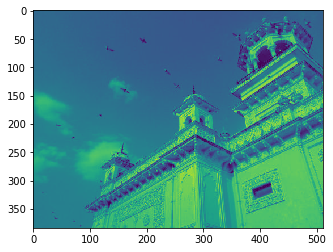

In [5]:
host= cv2.imread('test.jpg',0).astype('uint8')
rows,cols= host.shape
plt.imshow(host)

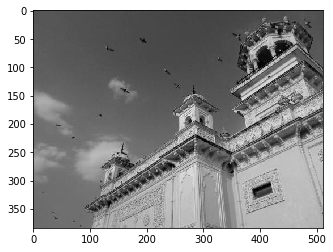

In [6]:
plt.imshow(host,'gray')

In [16]:
def encoder(host,bin_str):
    n=0;
    encoded=host.copy()
    for i in range(rows):
        for j in range(cols):
            if n<size:
                pix_bin= pixel_to_binary(encoded[i,j]) # The 8bit binary value of each pixel
                enc_bin= pix_bin[:-1] + bin_str[n]
                encoded[i,j]= binary_to_int(enc_bin)
                print((encoded[i,j],host[i,j]))
                n+=1
            else: break
        else:continue
        break
    return encoded

(88, 88)
(87, 87)
(84, 85)
(85, 84)
(84, 84)
(85, 85)
(86, 87)
(88, 88)
(86, 86)
(87, 86)
(87, 86)
(86, 86)
(87, 86)
(86, 86)
(86, 86)
(86, 86)
(84, 85)
(85, 85)
(85, 85)
(86, 86)
(87, 86)
(86, 87)
(86, 87)
(87, 87)
(86, 87)
(87, 87)
(87, 87)
(87, 86)
(86, 86)
(84, 85)
(85, 85)
(85, 85)
(86, 87)
(88, 88)
(89, 88)
(88, 88)
(88, 88)
(86, 87)
(86, 86)
(84, 85)
(84, 85)
(85, 85)
(85, 85)
(85, 85)
(84, 85)
(84, 85)
(85, 85)
(85, 85)
(84, 84)
(85, 84)
(85, 84)
(85, 84)
(84, 84)
(85, 84)
(84, 84)
(84, 84)
(84, 84)
(85, 84)
(85, 84)
(85, 84)
(84, 84)
(84, 84)
(85, 84)
(84, 84)
(84, 85)
(85, 85)
(85, 85)
(84, 84)
(85, 84)
(82, 83)
(82, 83)
(83, 83)
(84, 84)
(85, 84)
(85, 84)
(82, 83)
(83, 83)
(83, 82)
(83, 82)
(82, 82)
(80, 81)
(81, 81)
(81, 81)
(80, 81)
(80, 81)
(81, 81)
(81, 81)
(81, 81)
(82, 83)
(82, 83)
(83, 83)
(82, 82)
(82, 82)
(80, 81)
(80, 81)
(80, 81)
(78, 79)
(81, 80)
(81, 80)
(80, 81)
(81, 81)
(82, 82)
(82, 82)
(83, 83)
(78, 79)
(79, 79)
(79, 79)
(79, 79)
(78, 79)
(78, 79)
(79, 79)
(

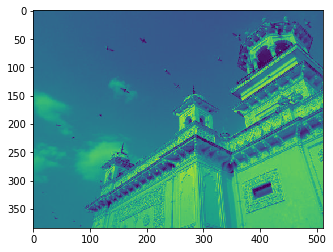

In [17]:
encoded= encoder(host,bin_str)
plt.imshow(encoded)

In [9]:
def decoder(encoded,length):
    message=''
    k=0
    for i in range(rows):
        for j in range(cols):
            if k<length:
                lsb=pixel_to_binary(encoded[i,j])[-1]
                message += lsb
                if k%8==7:
                    message += ' ' # For splitting at 8bit width we need a space ' ' at the end of every 8bits
                k+=1
            else: break
        else: continue
        break
    return message

In [10]:
decoded= decoder(encoded,message_len)
print(decoded)

01010100 01101000 01101001 01110011 00100000 01110011 01110100 01110010 01101001 01101110 01100111 00100000 01101001 01110011 00100000 01100101 01101110 01100011 01101111 01100100 01100101 01100100 


In [11]:
split_message= decoded.split()
print(split_message[0])
print(chr((int(split_message[0],2))))

01010100
T


In [12]:
final=''
for i in range(len(split_message)):
    final+=chr(int(split_message[i],2))

In [13]:
print(final)

This string is encoded
